In [36]:
#GENERAR TABLA PARA VARIABLES DE CLIMA ESPACIAL CON SU RESPECTIVA ETIQUETA POR HORA COMPLETA
import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import datetime
import time

data_file='/home/gfajardo/Desktop/Datos 121001/Summer-08&09 Huancayo-COMPLETO.csv'
column_names=['Año','Day','Tiempo','PRN','S4','Az','Elv','Vector_B','BX','BY','BZ','SW_Proton','SW_plasma','Kp_index','f10.7_index','AE-index']
Mli3 = pd.read_csv(data_file)#,names=column_names, header=2)
A = Mli3.drop(Mli3.columns[[0]], axis=1)
#Mli['Kp_index'] = (Mli['Año']).astype(int)
#Mli['f10.7_index'] = (Mli['Año']).astype(int)
print(A)

         Año    Day   Tiempo    PRN    S4     Az   Elv  Vector_B   BX   BY  \
0        8.0  348.0     52.0    2.0  0.06   93.5  33.1       5.1  4.5  0.4   
1        8.0  348.0     52.0    5.0  0.05  202.5  35.1       5.1  4.5  0.4   
2        8.0  348.0     52.0    9.0  0.03  145.9  61.5       5.1  4.5  0.4   
3        8.0  348.0     52.0   12.0  0.05  185.9  36.1       5.1  4.5  0.4   
4        8.0  348.0     52.0   15.0  0.06    6.1  33.3       5.1  4.5  0.4   
5        8.0  348.0     52.0   24.0  0.10    3.3  24.4       5.1  4.5  0.4   
6        8.0  348.0     52.0   26.0  0.23   17.1  17.6       5.1  4.5  0.4   
7        8.0  348.0     52.0   29.0  0.05  307.2  48.0       5.1  4.5  0.4   
8        8.0  348.0     52.0   30.0  0.08  229.8  26.8       5.1  4.5  0.4   
9        8.0  348.0     52.0  135.0  0.05  277.4  23.6       5.1  4.5  0.4   
10       8.0  348.0     52.0  138.0  0.03  288.4  50.6       5.1  4.5  0.4   
11       8.0  348.0    112.0    2.0  0.06   94.1  33.1       5.1

In [37]:
#print(A)
# Deleting columns
# Delete the "A" column from the dataframe
#data = A.drop("D", axis=1)
data1=A[A["Año"] == 8]
data=data1[data1["Day"] == 348 ]
data.describe()
#print(data)

,Año,Day,Tiempo,PRN,S4,Az,Elv,Vector_B,BX,BY,BZ,SW_Proton,SW_plasma,Kp_index,f10.7_index,AE-index
count,17491.0,17491.0,17491.000000,17491.000000,17491.000000,17491.000000,17491.000000,17491.000000,17491.000000,17491.000000,17491.000000,17491.000000,17491.000000,17491.000000,17491.0,17491.000000
mean,8.0,348.0,43416.477731,44.713167,0.092651,186.012761,35.210497,3.800257,2.526219,-1.439580,0.196455,2.401081,399.548625,3.987079,67.5,24.417643
std,0.0,0.0,24993.654175,49.864477,0.071805,101.797703,17.665304,0.992404,1.725779,1.427032,1.430294,0.658698,29.414272,3.982172,0.0,19.133455
min,8.0,348.0,52.000000,2.000000,0.020000,0.000000,9.800000,1.400000,-2.100000,-4.200000,-2.400000,1.700000,356.000000,0.000000,67.5,7.000000
25%,8.0,348.0,21352.000000,12.000000,0.040000,86.350000,21.300000,3.000000,1.400000,-2.600000,-1.000000,1.800000,373.000000,0.000000,67.5,10.000000
50%,8.0,348.0,43792.000000,22.000000,0.070000,193.900000,30.900000,4.100000,3.000000,-1.300000,-0.200000,2.100000,395.000000,3.000000,67.5,15.000000
75%,8.0,348.0,64732.000000,32.000000,0.130000,277.500000,50.500000,4.400000,3.900000,-0.100000,1.400000,2.800000,421.000000,7.000000,67.5,40.000000
max,8.0,348.0,86392.000000,138.000000,0.730000,360.000000,89.800000,5.200000,4.800000,0.900000,2.600000,3.900000,462.000000,13.000000,67.5,72.000000


In [ ]:
# Controlando valores nulos
#ONG_data.isnull().any().any()

In [74]:
data_encode=data.copy()
data_encode['class'] = pd.cut(data.S4, bins=[0, 0.10,0.15,0.25,1.5],
                            labels=['Nulo','Bajo','Medio','Fuerte'])


data_encode
#data.append(a)
#print(data)
#replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
#                                'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}
#labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
#replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

#print(replace_map_comp)

,Año,Day,Tiempo,PRN,S4,Az,Elv,Vector_B,BX,BY,BZ,SW_Proton,SW_plasma,Kp_index,f10.7_index,AE-index,class
0,8.0,348.0,52.0,2.0,0.06,93.5,33.1,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Nulo
1,8.0,348.0,52.0,5.0,0.05,202.5,35.1,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Nulo
2,8.0,348.0,52.0,9.0,0.03,145.9,61.5,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Nulo
3,8.0,348.0,52.0,12.0,0.05,185.9,36.1,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Nulo
4,8.0,348.0,52.0,15.0,0.06,6.1,33.3,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Nulo
5,8.0,348.0,52.0,24.0,0.10,3.3,24.4,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Nulo
6,8.0,348.0,52.0,26.0,0.23,17.1,17.6,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Medio
7,8.0,348.0,52.0,29.0,0.05,307.2,48.0,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Nulo
8,8.0,348.0,52.0,30.0,0.08,229.8,26.8,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Nulo
9,8.0,348.0,52.0,135.0,0.05,277.4,23.6,5.1,4.5,0.4,-2.4,2.7,402.0,13,67.5,19,Nulo


In [75]:
data_encode = data_encode[data_encode['Elv'] >= 40] #Filtrando elevaciones bajas (Evitar multipath)

In [87]:
#data_encode_specific = data_encode.copy()
#data_encode_specific['code'] = np.where(data_encode_specific['class'].str.contains('Fuerte'), 1, 0)

#data_encode_specific.describe()

,Año,Day,Tiempo,PRN,S4,Az,Elv,Vector_B,BX,BY,BZ,SW_Proton,SW_plasma,Kp_index,f10.7_index,AE-index,code
count,6253.0,6253.0,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.0,6253.000000,6253.000000
mean,8.0,348.0,41131.360307,45.331841,0.040520,198.965345,55.560739,3.858676,2.598065,-1.484583,0.208492,2.366000,400.295218,4.141852,67.5,25.449064,0.001759
std,0.0,0.0,24039.523156,51.290749,0.017295,99.736023,10.909708,0.947379,1.708483,1.414836,1.413693,0.643558,29.510896,4.040723,0.0,19.697582,0.041909
min,8.0,348.0,52.000000,3.000000,0.020000,0.000000,40.000000,1.400000,-2.100000,-4.200000,-2.400000,1.700000,356.000000,0.000000,67.5,7.000000,0.000000
25%,8.0,348.0,20032.000000,11.000000,0.030000,130.100000,49.300000,3.200000,1.400000,-2.600000,-0.900000,1.800000,373.000000,3.000000,67.5,9.000000,0.000000
50%,8.0,348.0,40432.000000,23.000000,0.040000,207.300000,50.600000,4.100000,3.000000,-1.800000,-0.100000,2.100000,395.000000,3.000000,67.5,15.000000,0.000000
75%,8.0,348.0,59692.000000,32.000000,0.040000,288.400000,62.700000,4.500000,3.900000,-0.100000,1.400000,2.800000,422.000000,7.000000,67.5,40.000000,0.000000
max,8.0,348.0,86392.000000,138.000000,0.210000,360.000000,89.800000,5.200000,4.800000,0.900000,2.600000,3.900000,462.000000,13.000000,67.5,72.000000,1.000000


In [7]:
!pip install tflearn

^C
Traceback (most recent call last):
  File "/home/gfajardo/anaconda3/bin/pip", line 7, in <module>
    from pip._internal import main
  File "/home/gfajardo/anaconda3/lib/python3.7/site-packages/pip/_internal/__init__.py", line 40, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/gfajardo/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/autocompletion.py", line 8, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/gfajardo/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/home/gfajardo/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/cmdoptions.py", line 22, in <module>
    from pip._internal.utils.hashes import STRONG_HASHES
  File "/home/gfajardo/anaconda3/lib/python3.7/site-packages/pip/_internal/utils/hashes.py", line 10, in <module>
    from pip._internal.utils.misc import read_chunks
  File 

In [8]:
!pip install IPython

In [9]:
!pip install pydotplus

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [76]:
data_encode2= data_encode

In [77]:
# Calculating the correlation matrix
corr = data_encode2.corr()
corr

,Año,Day,Tiempo,PRN,S4,Az,Elv,Vector_B,BX,BY,BZ,SW_Proton,SW_plasma,Kp_index,f10.7_index,AE-index
Año,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tiempo,NaN,NaN,1.000000,0.028449,-0.294296,0.116148,0.064335,-0.589262,-0.023181,0.333388,0.023344,0.330883,-0.691021,-0.823670,NaN,-0.274420
PRN,NaN,NaN,0.028449,1.000000,-0.195662,0.486962,-0.256218,-0.030435,-0.039212,-0.000138,-0.001704,0.025401,0.018592,0.007387,NaN,-0.021803
S4,NaN,NaN,-0.294296,-0.195662,1.000000,-0.106788,-0.377819,0.200039,0.191982,0.038730,-0.155783,-0.168979,0.185484,0.403171,NaN,0.229005
Az,NaN,NaN,0.116148,0.486962,-0.106788,1.000000,-0.183145,-0.100679,-0.019679,0.090086,0.038607,0.042520,-0.075002,-0.096770,NaN,-0.011236
Elv,NaN,NaN,0.064335,-0.256218,-0.377819,-0.183145,1.000000,-0.039615,0.009951,0.039682,-0.057899,0.019236,-0.097194,-0.118737,NaN,0.024810
Vector_B,NaN,NaN,-0.589262,-0.030435,0.200039,-0.100679,-0.039615,1.000000,0.379052,-0.201574,-0.079060,-0.647629,0.116297,0.532220,NaN,0.215786
BX,NaN,NaN,-0.023181,-0.039212,0.191982,-0.019679,0.009951,0.379052,1.000000,0.553700,-0.703494,-0.510611,-0.614693,0.233261,NaN,0.497491
BY,NaN,NaN,0.333388,-0.000138,0.038730,0.090086,0.039682,-0.201574,0.553700,1.000000,-0.470648,0.059552,-0.473185,-0.071617,NaN,0.203169


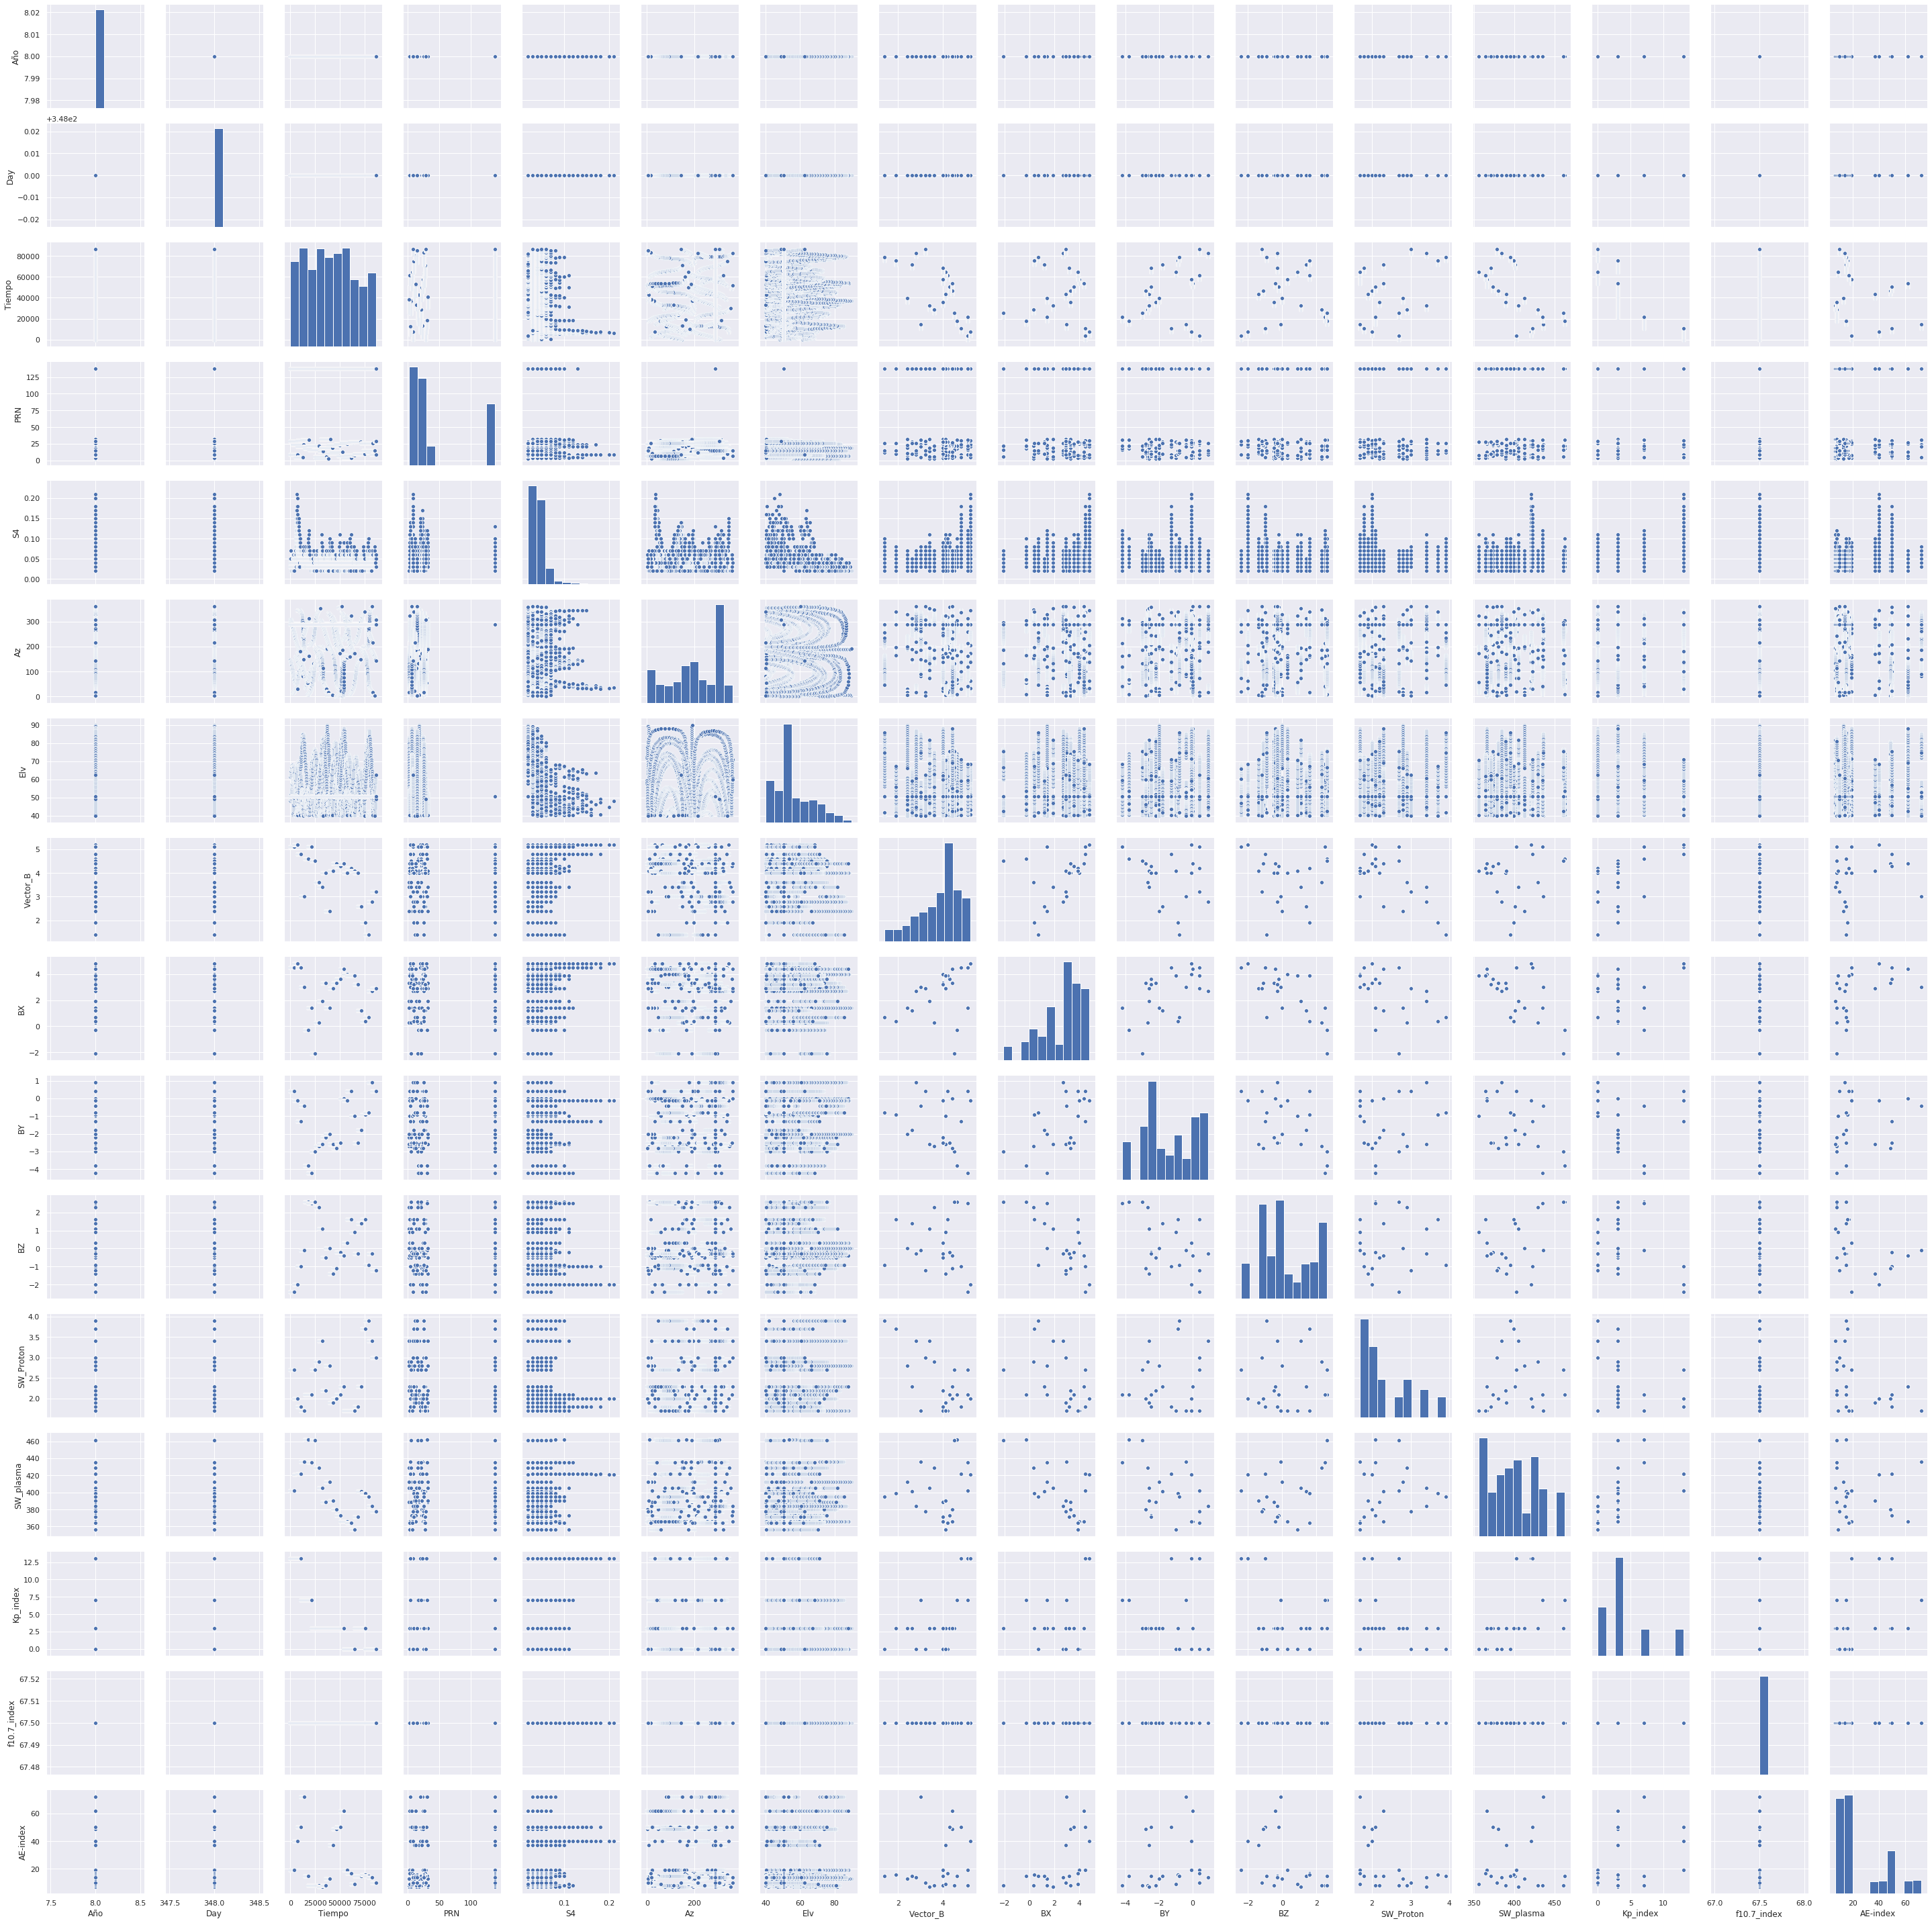

In [43]:
# Generating a heatmap
#sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)
sns.pairplot(data_encode2)

In [85]:
data_encode3 = data_encode2.drop('S4', axis=1)

x = data_encode3.iloc[:,2:15].values
y = data_encode3.iloc[:,15]

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(y)

2        Nulo
7        Nulo
10       Nulo
13       Nulo
18       Nulo
21       Nulo
24       Nulo
29       Nulo
32       Nulo
35       Nulo
40       Nulo
44       Nulo
47       Nulo
52       Nulo
55       Nulo
58       Nulo
63       Nulo
66       Nulo
69       Nulo
74       Nulo
77       Nulo
80       Nulo
85       Nulo
88       Nulo
91       Nulo
97       Nulo
100      Nulo
103      Nulo
109      Nulo
112      Nulo
         ... 
17373    Nulo
17378    Nulo
17382    Nulo
17385    Nulo
17390    Nulo
17394    Nulo
17397    Nulo
17402    Nulo
17406    Nulo
17409    Nulo
17414    Nulo
17418    Nulo
17421    Nulo
17426    Nulo
17430    Nulo
17433    Nulo
17438    Nulo
17442    Nulo
17445    Nulo
17450    Nulo
17454    Nulo
17457    Nulo
17462    Nulo
17466    Nulo
17469    Nulo
17474    Nulo
17478    Nulo
17481    Nulo
17486    Nulo
17490    Nulo
Name: class, Length: 6253, dtype: category
Categories (4, object): [Nulo < Bajo < Medio < Fuerte]


In [86]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [87]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = sum(cm[i][i] for i in range(3)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

[[   6    5   15]
 [   0    2    0]
 [   0    0 1536]]
accuracy = 0.9872122762148338


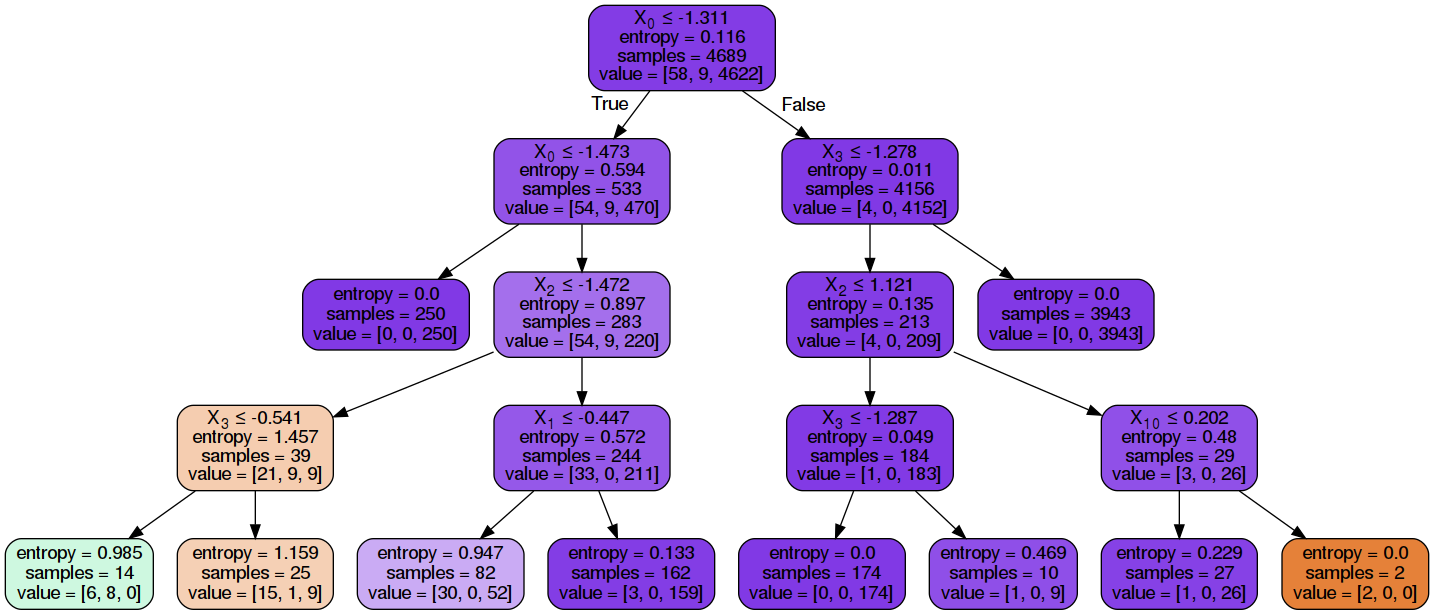

In [89]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [90]:
classifier2 = DecisionTreeClassifier(criterion = 'entropy')
classifier2.fit(x_train, y_train)
y_pred2 = classifier2.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy2 = sum(cm2[i][i] for i in range(2)) / y_test.shape[0]
print("accuracy = " + str(accuracy2))

[[  15    3    8]
 [   1    1    0]
 [   2    0 1534]]
accuracy = 0.010230179028132993


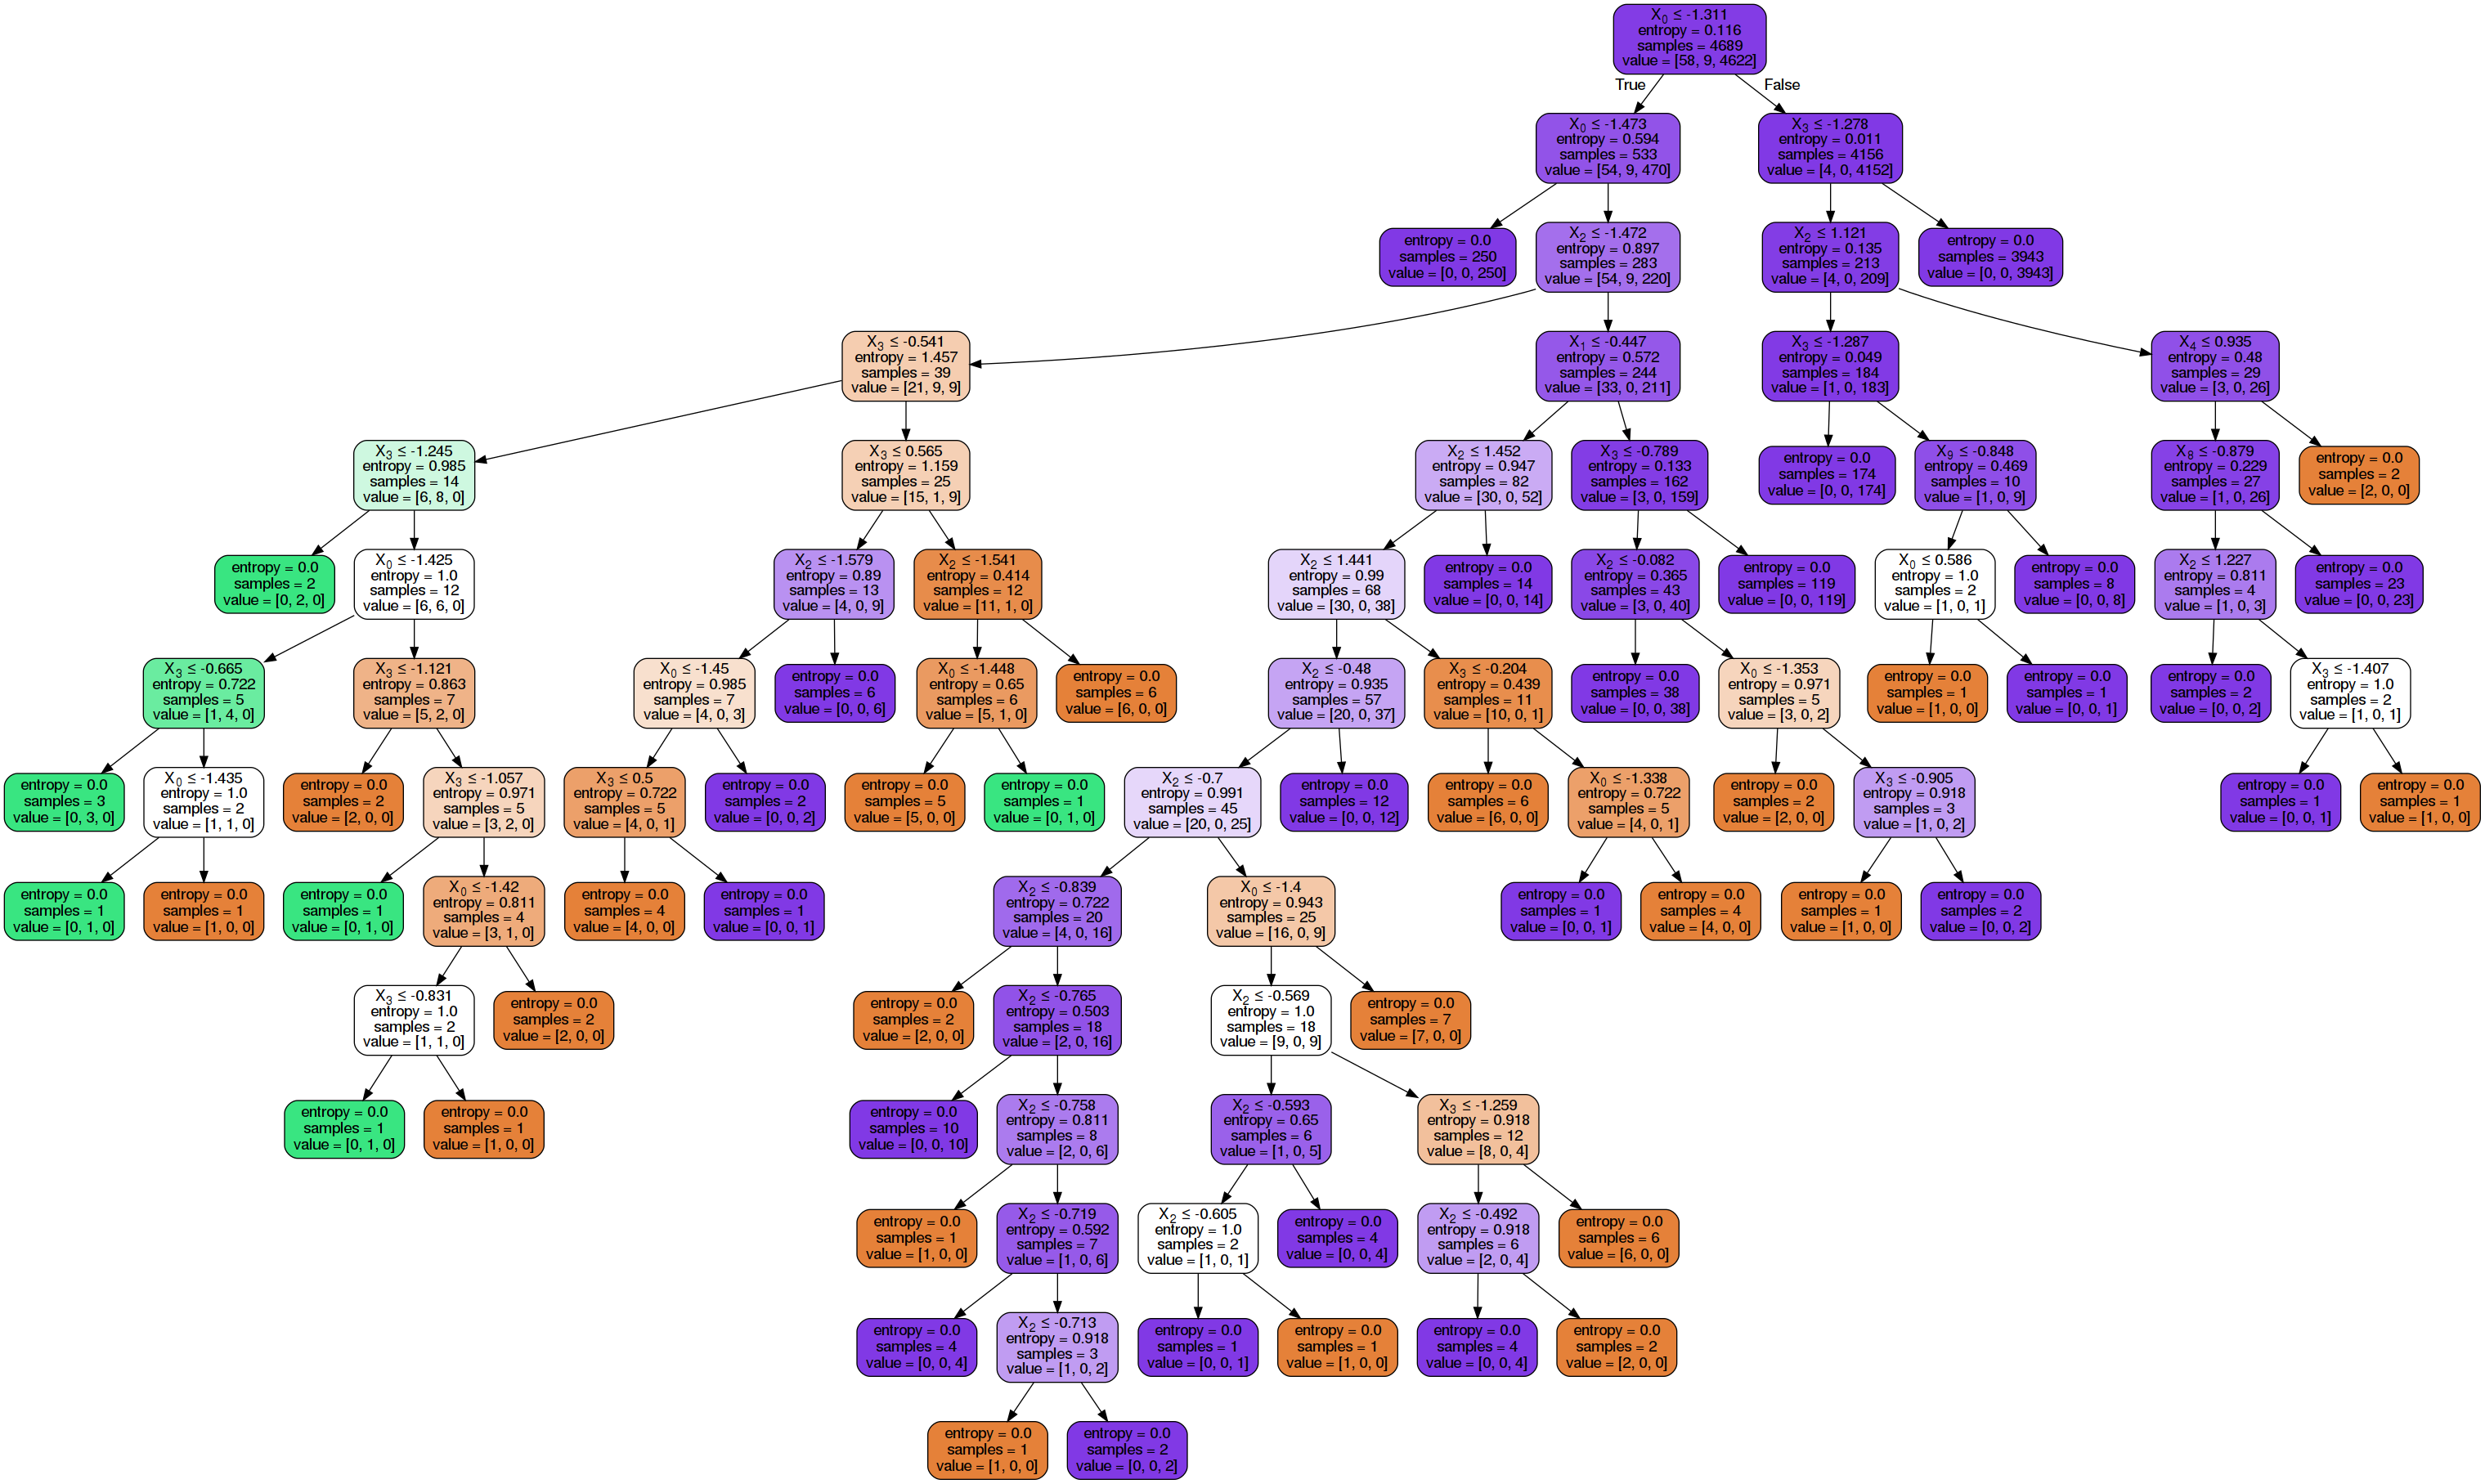

In [91]:
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())